In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from platform import python_version
  
print("Current Python Version-", python_version())

Current Python Version- 3.9.7


# I. Lý thuyết

<font size="4">`LogisticRegression` (có tên gọi khác Logit Regression) là mô hình học máy thuộc nhóm `Học có giám sát (Supervised Learning)` và thường được sử dụng trong các bài toán `phân loại (classification)`:</font>
> - Thuộc họ `linear models`
> - Mô hình này giống với Hồi quy tuyến tính (LinearRegression) ở khía cạnh đầu ra là số thực, và giống với PLA ở việc đầu ra bị giới hạn trong khoảng nhất định
> - Mặc dù trong tên có chứa từ regression, logistic regression thường được sử dụng nhiều hơn cho các bài toán classification (cụ thể là Binary Classification).
> - 1 số ví dụ: xác suất thi đỗ nếu biết thời gian ôn thi, xác suất ngày mai có mưa dựa trên những thông tin đo được trong ngày hôm nay,…
> - Output: có thể được thể hiện dưới dạng xác suất (probability). (Hoặc quy định gán nhãn thành 0-1) 


<font size="4.5"> $ y_{predict} = h_\theta(x) = f(\mathbf{w}^T\mathbf{x})$ </font>

<font size="4"> Trong đó $f()$ được gọi là activation function. **Một số hàm Activation Function** </font>
<img src="https://machinelearningcoban.com/assets/LogisticRegression/activation.png" width="70%" height="70%">

<font size="5"> Ví dụ chi Logistic Đơn biến: </font>

<font size="4"> **Một nhóm 20 sinh viên dành thời gian trong khoảng từ 0 đến 6 giờ cho việc ôn thi. Thời gian ôn thi này ảnh hưởng đến xác suất sinh viên vượt qua kỳ thi như thế nào?** </font>

In [ ]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
df = pd.DataFrame(y,X[0]).reset_index()
df=df.rename(columns = {"index":"Thời gian ôn thi", 0: "Đậu/Rớt"})
df

,Thời gian ôn thi,Đậu/Rớt
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


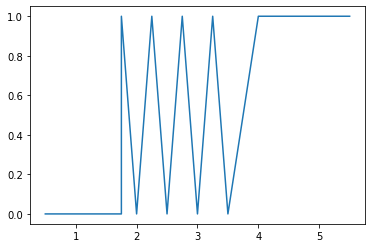

In [ ]:
plt.plot(df['Thời gian ôn thi'],df['Đậu/Rớt'])

In [ ]:
# extended data 
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
X

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
        3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ]])

In [ ]:
X.shape[0]

2

## Chọn **Sigmoid** làm Activation Fuction:

<font size="5"> $f(s) = \frac{1}{1 + e^{-s}} \triangleq \sigma(s)$ </font>

In [ ]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

In [ ]:
def predict(x, w):  #tính y predic
    return sigmoid(np.dot(w[-1].T, x)) 

In [ ]:
# Init value:
np.random.seed(10)
alpha = .05     # Init Learning rate
d = X.shape[0]  # Dimension of X
w_init = np.random.randn(d, 1) # Init W 

In [ ]:
w_init # w ban đầu

array([[1.3315865 ],
       [0.71527897]])

<font size="5"> CostFunction</font>  

<img src="https://miro.medium.com/max/1838/1*dEZxrHeNGlhfNt-JyRLpig.png">

<font size="5"> **CostFunction của Logistic Regression sẽ được tính bằng tổng độ lỗi của từng class (Loss of Class)**</font>

**Độ lỗi của từng class:**

<img src="https://miro.medium.com/max/788/1*28r0P7DRmcjZi6spYUauzw.png">

**Tổng độ lỗi của các class: (2 class đối với logistic regression cho phân loại nhị phân)**

<img src="https://miro.medium.com/max/1125/1*wz59MnXkXdWxrq_fkA2wew.png">

[Đọc thêm về LossFunction](https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/)


In [ ]:
def cost(X,y,w):
    N = X.shape[1]
    cost = [-y.T*np.log(predict(X,w)), (1-y).T*np.log(1-predict(X,w))]
    J = -(sum(cost[0][0])+sum(cost[1][0]))/N
    return J

In [ ]:
def plot_logistic(X,y,w):
    X0 = X[1, np.where(y == 0)][0]
    y0 = y[np.where(y == 0)]
    X1 = X[1, np.where(y == 1)][0]
    y1 = y[np.where(y == 1)]
    plt.plot(X0, y0, 'ro', markersize = 8)
    plt.plot(X1, y1, 'bs', markersize = 8)
    xx = np.linspace(0, 6, 1000)
    w0 = w[-1][0][0]
    w1 = w[-1][1][0]
    threshold = -w0/w1
    yy = sigmoid(w0 + w1*xx)
    plt.axis([-0.5, 6, -0.25, 1.25])
    plt.plot(xx, yy, 'g-', linewidth = 2)
    plt.plot(threshold, .5, 'y^', markersize = 8)
    plt.show()

In [ ]:
def gradient_descent(X, y, w, alpha, max_count = 5000, tol = 1e-4):
    count = 0
    N = X.shape[1]  # Sample size
    d = X.shape[0]  # Dimension
    plot_logistic(X,y,w)
    J = [cost(X,y,w)]
    while count < max_count:
        # mix data 
        shuffle = np.random.permutation(N)   # Suffle the array (and leaves the original array un-changed)
        # Stochastic Gradient descent:
        for i in shuffle:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            y_pre = predict(xi,w)   # Calculate Y_Predict
            w_new = w[-1] + alpha*(yi - y_pre)*xi    # Update w (cần xem lại)
            j_new = cost(xi,y,w)
            J.append(j_new)
            count += 1
            # if count < 700 and count%100:
            #     plot_logistic(X,y,w)
            #Check w after 20 loops for stopping:
            if count%20 == 0:         
                if np.linalg.norm(w_new - w[-20]) < tol:  # Nếu giá trị w thay đỏi không đáng kể (chênh lệch thấp hơn 0.0001) thì kết thúc vòng lặp 
                    return w
                    break
            w.append(w_new) # Update 
    return w , J

In [ ]:
def logistic_sigmoid_regression(X, y, w_init, alpha):
    w = [w_init]    # w is List of W (update list by gradient descent)
    w , J = gradient_descent(X, y, w, alpha, tol = 1e-4)
    plot_logistic(X,y,w)
    return w , J


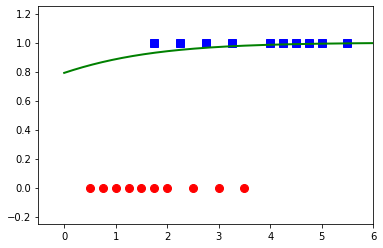

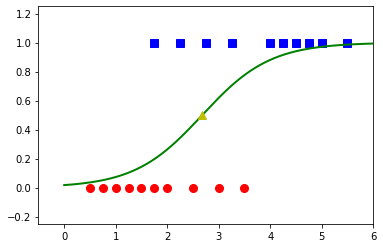

array([[-4.06099744],
       [ 1.51541097]])

In [ ]:
# Calculate W 
w, J = logistic_sigmoid_regression(X, y, w_init, alpha)
w[-1]

<font size="4"> **Hàm chúng ta tìm được sau khi thực hiện Gradient Descent cho LogisticRegression:** </font>

<font size="4">$ s = (-4.14681179).x + 1.41748334 $ </font>

<font size="4"> $f(s) = \frac{1}{1 + e^{-((-4.14681179).x + 1.41748334)}} \triangleq \sigma((-4.14681179).x + 1.41748334)$ </font>


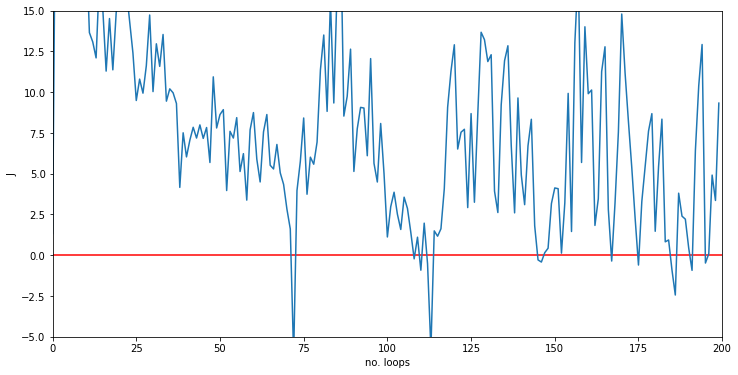

In [ ]:
plt.figure(figsize=(12,6))
plt.axis([0, 200, -5, 15])
plt.plot(np.linspace(0, 0, 1000), 'r')
plt.plot(J[:200])
plt.xlabel('no. loops')
plt.ylabel('J')
plt.show()

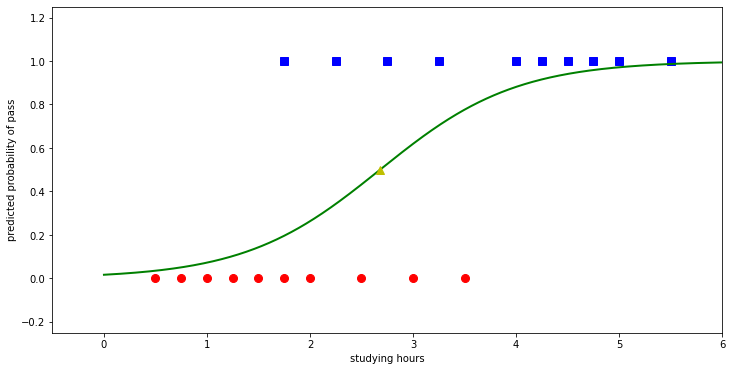

In [ ]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.figure(figsize=(12,6))
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)

plt.axis([-0.5, 6, -0.25, 1.25])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

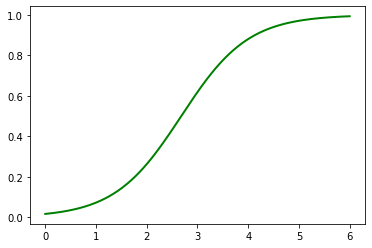

In [ ]:
xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
yy = sigmoid(w0 + w1*xx)

plt.plot(xx, yy, 'g-', linewidth = 2)

<font size="5"> **Confusion Matrix : Để tính độ chính xác của mô hình phân loại, nhằm mục đích so sánh với những mô hình phân loại khác**</font>

<img src="https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg">

# Logistic đa biến

In [ ]:
# Import Data:
df = pd.read_csv('titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df1 = df[["Pclass","Sex","Age","SibSp","Parch","Fare",'Survived']]
df1

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
888,3,female,NaN,1,2,23.4500,0
889,1,male,26.0,0,0,30.0000,1


In [ ]:
df1 = df1.replace(('male','female'), (1,0))

In [ ]:
# Bỏ những hàng chứa giá trị thiếu
df1 = df1.dropna()
df1

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,0
886,2,1,27.0,0,0,13.0000,0
887,1,0,19.0,0,0,30.0000,1
889,1,1,26.0,0,0,30.0000,1


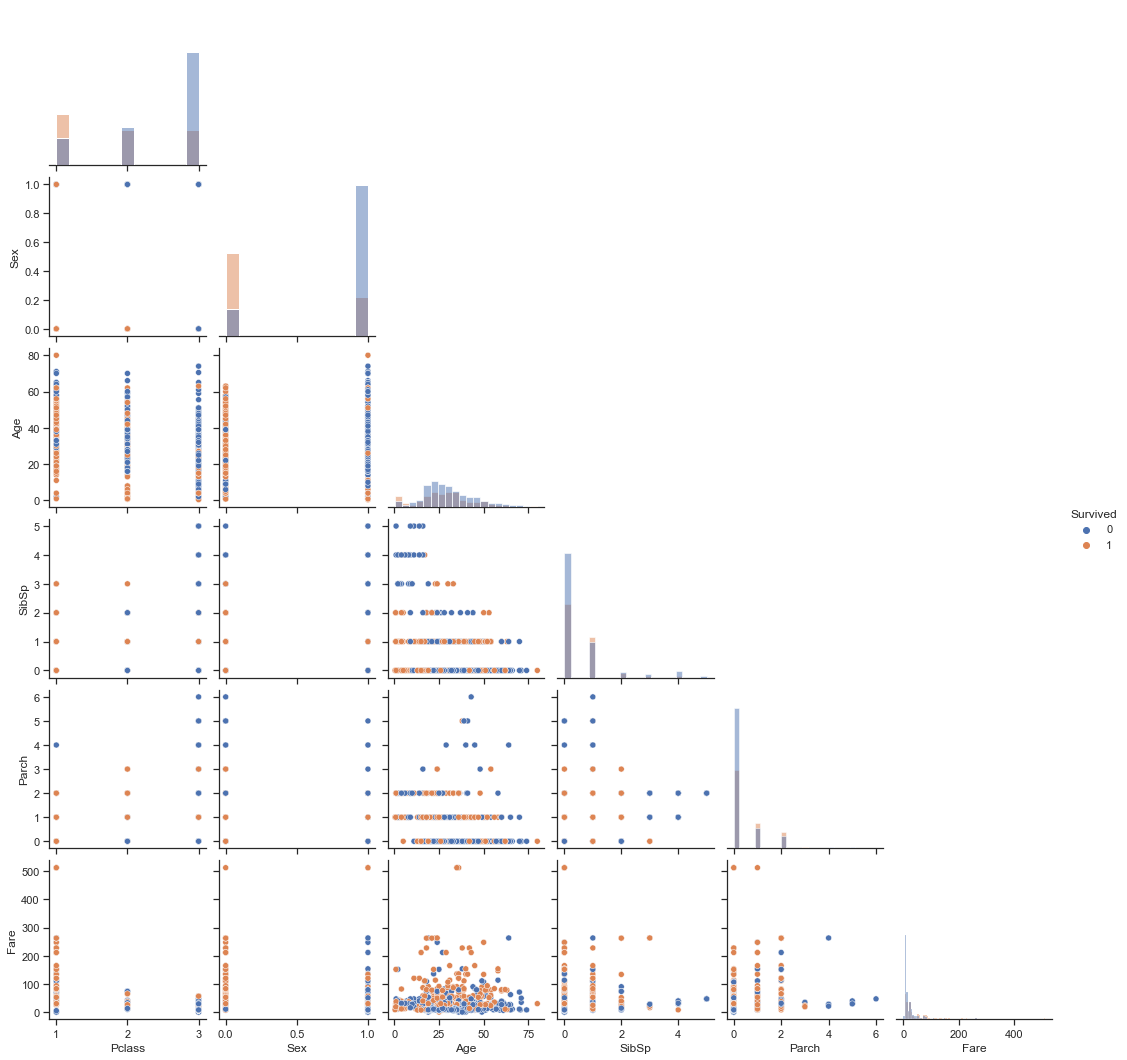

<Figure size 576x576 with 0 Axes>

<Figure size 120x80 with 0 Axes>

In [ ]:
# PairPlot
import seaborn as sns
sns.set_theme(style="ticks")
sns.color_palette("hls", 8)
sns.pairplot(df1, corner=True, hue="Survived",diag_kind="hist")
plt.figure(figsize=(8,8))
plt.figure(dpi=20)
plt.show()

In [ ]:
# Y thực tế:
# 0 : chết
# 1 : sống
y = df1['Survived']
y = np.array(y)

In [ ]:
# Chuẩn bị training set:  
X = pd.DataFrame.to_numpy(df1[["Pclass","Sex","Age","SibSp","Parch","Fare"]])
X = X.T
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
X.shape

(7, 714)

In [ ]:
# Khởi tạo tham số:
np.random.seed(10)
alpha = .05     # Init Learning rate
d = X.shape[0]  # Dimension of X
w_init = np.random.randn(d, 1) # Init W 

In [ ]:
# Trọng số ban đầu
w_init

array([[ 1.3315865 ],
       [ 0.71527897],
       [-1.54540029],
       [-0.00838385],
       [ 0.62133597],
       [-0.72008556],
       [ 0.26551159]])

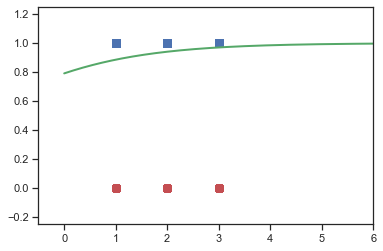

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_21696/3514198970.py:3: RuntimeWarning: divide by zero encountered in log
  cost = [-y.T*np.log(predict(X,w)), (1-y).T*np.log(1-predict(X,w))]
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_21696/3514198970.py:3: RuntimeWarning: invalid value encountered in multiply
  cost = [-y.T*np.log(predict(X,w)), (1-y).T*np.log(1-predict(X,w))]
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_21696/413014622.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-s))


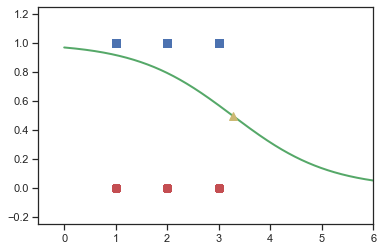

In [ ]:
# Calculate W 
w, J = logistic_sigmoid_regression(X, y, w_init, alpha)
a = predict(X,w)
a = a[0]

In [ ]:
w[-1]

array([[  3.47274779],
       [ -1.06252791],
       [-25.66529316],
       [ -0.94943651],
       [-16.50145658],
       [ -5.26629265],
       [  1.58354525]])

In [ ]:
# Phân loại
output=[]
for i in a:
    if i > 0.5:
        output.append(1)
    else:
        output.append(0)

In [ ]:
dftest = df1[['Pclass','Age','Survived']]
dftest['predict'] = output
dftest.head(10)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_21696/2691970786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['predict'] = output


,Pclass,Age,Survived,predict
0,3,22.0,0,0
1,1,38.0,1,1
2,3,26.0,1,0
3,1,35.0,1,1
4,3,35.0,0,0
6,1,54.0,0,1
7,3,2.0,0,0
8,3,27.0,1,0
9,2,14.0,1,1
10,3,4.0,1,1


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(dftest['Survived'], dftest['predict']))

,0,1
0,375,49
1,150,140


<AxesSubplot:>

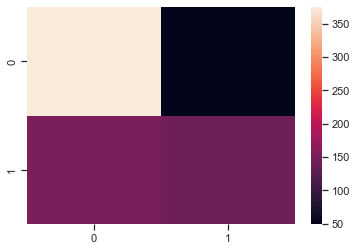

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(dftest['Survived'], dftest['predict']))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(dftest['Survived'], dftest['predict']))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       424
           1       0.74      0.48      0.58       290

    accuracy                           0.72       714
   macro avg       0.73      0.68      0.69       714
weighted avg       0.73      0.72      0.71       714



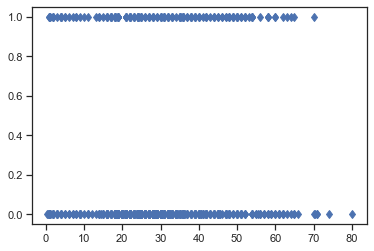

In [ ]:
plt.plot(dftest['Age'], dftest['predict'], 'd')

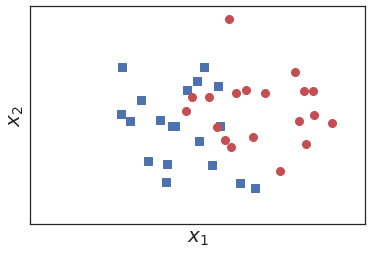

In [ ]:
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.show()

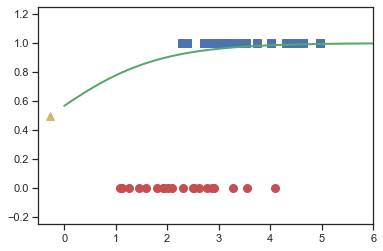

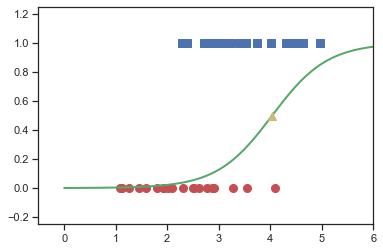

array([[-7.52749101],
       [ 1.86461516],
       [ 1.11554698]])

In [ ]:
X = np.concatenate((X0, X1), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w, J = logistic_sigmoid_regression(X, y, w_init, eta)
w[-1]

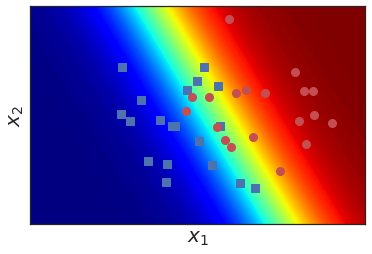

In [ ]:
# Make data.
xm = np.arange(-1, 6, 0.025)
xlen = len(xm)
ym = np.arange(0, 4, 0.025)
ylen = len(ym)
xm, ym = np.meshgrid(xm, ym)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
zm = sigmoid(w0 + w1*xm + w2*ym)

CS = plt.contourf(xm, ym, zm, 200, cmap='jet')

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()